In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from scipy.optimize import curve_fit

In [3]:
### funcion para extraer columnas de datos, coordenada l y coordenada b de los espectros
### extract_data: str -> pandas_data_frame, float, float
def extract_data(data_name):

    # verificamos que la entrada sea un string (nombre del archivo)
    assert type(data_name) == str, 'data_name should be an str'

    # abrimos el dataframe
    df = pd.read_csv(data_name, sep = ';')

    # Extract relevant rows and split the single column into 'vel' and 'Temp' based on whitespace
    # Select columns 1 and 2 after splitting to skip the initial empty column
    data = df.iloc[106:].iloc[:, 0].str.split(r'\s+', expand=True).iloc[:, 1:3].rename(columns={1: 'vel', 2: 'Temp'})

    # cambiamos el formato de los datos almacenados, para que sean del tipo numerico
    data.vel = pd.to_numeric(data.vel)
    data.Temp = pd.to_numeric(data.Temp)

    # almacenamos las coordenadas del espectro
    l_coord = float(df.iloc[20].to_numpy()[0][4:])
    b_coord = float(df.iloc[21].to_numpy()[0][4:])

    return data, l_coord, b_coord

In [4]:
def extract_data_fixed(filename):
    # Leer todo el archivo como texto
    with open(filename, 'r') as file:
        lines = file.readlines()

    # --- 1. Buscar coordenadas 'lii' y 'bii' ---
    l_coord = None
    b_coord = None
    for line in lines:
        if line.startswith("lii:"):
            l_coord = float(line.split(':')[1].strip())
        if line.startswith("bii:"):
            b_coord = float(line.split(':')[1].strip())

    # Validar que se encontraron
    if l_coord is None or b_coord is None:
        raise ValueError("No se pudieron encontrar las coordenadas 'lii' o 'bii' en el archivo.")

    # --- 2. Extraer datos numéricos ---
    # Los datos comienzan después de la línea vacía entre el header y la tabla
    data_lines = []
    for line in lines:
        # Si la línea tiene dos números separados por espacios, la agregamos
        parts = line.strip().split()
        if len(parts) == 2:
            try:
                float(parts[0])
                float(parts[1])
                data_lines.append(parts)
            except ValueError:
                pass

    # Convertir a DataFrame
    data = pd.DataFrame(data_lines, columns=["vel", "Temp"], dtype=float)

    return data, l_coord, b_coord


In [5]:
!git clone https://github.com/amaliamartinez-netizen/data_espectros.git

Cloning into 'data_espectros'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 37.24 KiB | 615.00 KiB/s, done.


In [6]:
path = "data_espectros/data/"


In [7]:
df = pd.read_csv(path+'sdf_111_111', sep = ';')
df.iloc[106:]

,fmt: 15
106,40.160\t 0.260
107,39.843\t -0.182
108,39.525\t -0.226
109,39.208\t -0.029
110,38.890\t 0.006
...,...
356,-39.208\t 0.258
357,-39.525\t 0.268
358,-39.843\t -0.191
359,-40.160\t 0.255


In [8]:
data = df.iloc[106:].iloc[:, 0].str.split(r'\s+', expand=True).rename(columns={1: 'vel', 2: 'Temp'})


In [9]:
data.vel.__array__(dtype = float)

array([ 40.16 ,  39.843,  39.525,  39.208,  38.89 ,  38.573,  38.255,
        37.938,  37.62 ,  37.303,  36.985,  36.668,  36.351,  36.033,
        35.716,  35.398,  35.081,  34.763,  34.446,  34.128,  33.811,
        33.493,  33.176,  32.858,  32.541,  32.223,  31.906,  31.588,
        31.271,  30.954,  30.636,  30.319,  30.001,  29.684,  29.366,
        29.049,  28.731,  28.414,  28.096,  27.779,  27.461,  27.144,
        26.826,  26.509,  26.191,  25.874,  25.556,  25.239,  24.922,
        24.604,  24.287,  23.969,  23.652,  23.334,  23.017,  22.699,
        22.382,  22.064,  21.747,  21.429,  21.112,  20.794,  20.477,
        20.159,  19.842,  19.525,  19.207,  18.89 ,  18.572,  18.255,
        17.937,  17.62 ,  17.302,  16.985,  16.667,  16.35 ,  16.032,
        15.715,  15.397,  15.08 ,  14.762,  14.445,  14.127,  13.81 ,
        13.493,  13.175,  12.858,  12.54 ,  12.223,  11.905,  11.588,
        11.27 ,  10.953,  10.635,  10.318,  10.   ,   9.683,   9.365,
         9.048,   8.

In [10]:
data.vel.to_numpy(dtype=float)

array([ 40.16 ,  39.843,  39.525,  39.208,  38.89 ,  38.573,  38.255,
        37.938,  37.62 ,  37.303,  36.985,  36.668,  36.351,  36.033,
        35.716,  35.398,  35.081,  34.763,  34.446,  34.128,  33.811,
        33.493,  33.176,  32.858,  32.541,  32.223,  31.906,  31.588,
        31.271,  30.954,  30.636,  30.319,  30.001,  29.684,  29.366,
        29.049,  28.731,  28.414,  28.096,  27.779,  27.461,  27.144,
        26.826,  26.509,  26.191,  25.874,  25.556,  25.239,  24.922,
        24.604,  24.287,  23.969,  23.652,  23.334,  23.017,  22.699,
        22.382,  22.064,  21.747,  21.429,  21.112,  20.794,  20.477,
        20.159,  19.842,  19.525,  19.207,  18.89 ,  18.572,  18.255,
        17.937,  17.62 ,  17.302,  16.985,  16.667,  16.35 ,  16.032,
        15.715,  15.397,  15.08 ,  14.762,  14.445,  14.127,  13.81 ,
        13.493,  13.175,  12.858,  12.54 ,  12.223,  11.905,  11.588,
        11.27 ,  10.953,  10.635,  10.318,  10.   ,   9.683,   9.365,
         9.048,   8.

In [11]:
#extraemos las 15 mediciones
data_111, lcoord_111, bcoord_111 = extract_data(path+'sdf_111_111')
data_112, lcoord_112, bcoord_112 = extract_data(path+'sdf_112_112')
data_113, lcoord_113, bcoord_113 = extract_data(path+'sdf_113_113')
data_114, lcoord_114, bcoord_114 = extract_data(path+'sdf_114_114')
data_115, lcoord_115, bcoord_115 = extract_data(path+'sdf_115_115')
data_116, lcoord_116, bcoord_116 = extract_data(path+'sdf_116_116')
data_117, lcoord_117, bcoord_117 = extract_data(path+'sdf_117_117')
data_118, lcoord_118, bcoord_118 = extract_data(path+'sdf_118_118')
data_119, lcoord_119, bcoord_119 = extract_data(path+'sdf_119_119')
data_120, lcoord_120, bcoord_120 = extract_data(path+'sdf_120_120')
data_121, lcoord_121, bcoord_121 = extract_data(path+'sdf_121_121')
data_122, lcoord_122, bcoord_122 = extract_data(path+'sdf_122_122')
data_123, lcoord_123, bcoord_123 = extract_data(path+'sdf_123_123')
data_124, lcoord_124, bcoord_124 = extract_data(path+'sdf_124_124')
data_125, lcoord_125, bcoord_125 = extract_data(path+'sdf_125_125')


In [12]:
#promediamos las temperaturas
prom_1=(data_111.Temp+data_116.Temp+data_121.Temp)/3
prom_2=(data_112.Temp+data_117.Temp+data_122.Temp)/3
prom_3=(data_113.Temp+data_118.Temp+data_123.Temp)/3
prom_4=(data_114.Temp+data_119.Temp+data_124.Temp)/3
prom_5=(data_115.Temp+data_120.Temp+data_125.Temp)/3

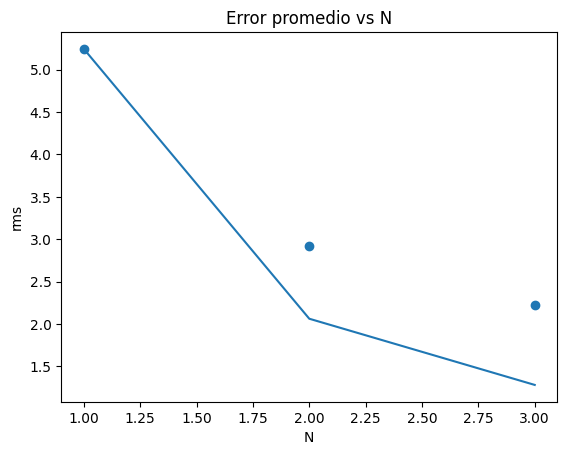

In [39]:
#error promedio

def error_prom(data, N):
  prom_x= np.mean(data)
  suma=0
  for i in range(len(data)):
    suma=suma+(data.iloc[i]-prom_x)**2
  return np.sqrt(suma/N)


data1=data_111.Temp <= 2
data2= ((data_111.Temp+data_116.Temp)/2) <= 2
data3= ((data_111.Temp+data_116.Temp+data_121.Temp)/3) <= 2
rms_N1= error_prom(data_111.Temp[data1], 1)
rms_N2= error_prom(((data_111.Temp+data_116.Temp)/2)[data2], 2)
rms_N3= error_prom(((data_111.Temp+data_116.Temp+data_121.Temp)/3)[data3], 3)

rms=np.array([rms_N1, rms_N2, rms_N3])
N=np.array([1, 2, 3])
plt.scatter(N, rms)
plt.plot(N, (rms/np.sqrt(N)))
plt.title('Error promedio vs N')
plt.xlabel('N')
plt.ylabel('rms')
plt.show()

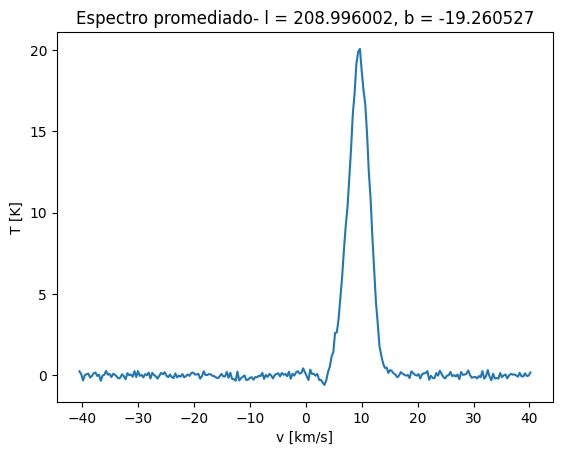

In [13]:
plt.plot(data_111.vel, prom_1, label = 'prom_1')
plt.title('Espectro promediado- l = ' + str(lcoord_111) + ', b = ' + str(bcoord_111))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()


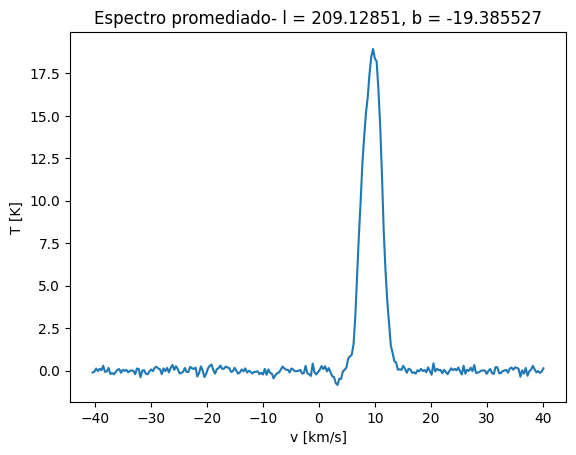

In [14]:
plt.plot(data_112.vel, prom_2, label = 'prom_2')
plt.title('Espectro promediado- l = ' + str(lcoord_114) + ', b = ' + str(bcoord_114))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()


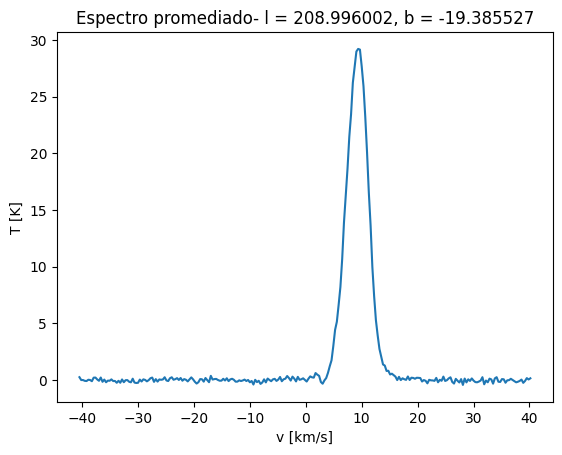

In [15]:

plt.plot(data_112.vel, prom_3, label = 'prom_2')
plt.title('Espectro promediado- l = ' + str(lcoord_118) + ', b = ' + str(bcoord_118))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()


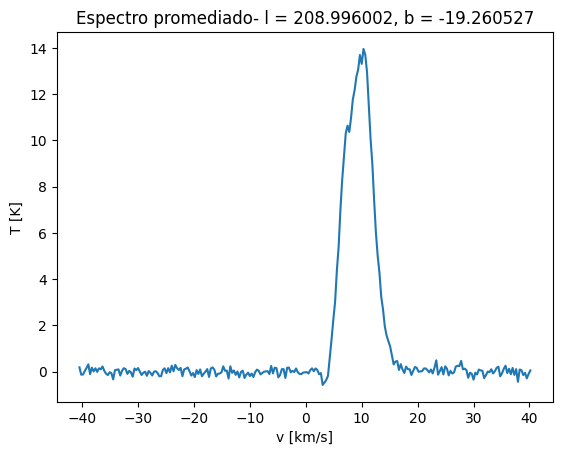

In [16]:
plt.plot(data_114.vel, prom_4, label = 'prom_4')
plt.title('Espectro promediado- l = ' + str(lcoord_121) + ', b = ' + str(bcoord_121))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()



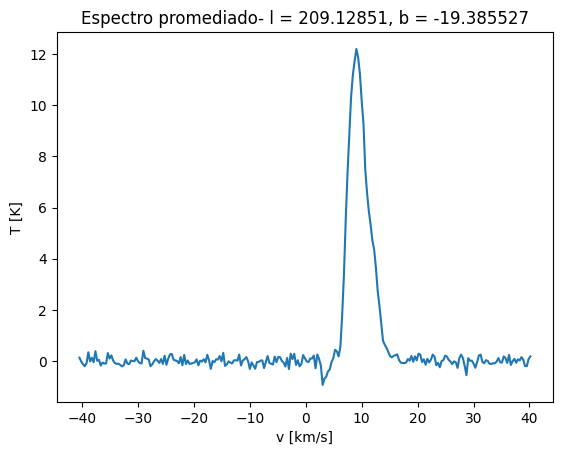

In [17]:
plt.plot(data_115.vel, prom_5, label = 'prom_5')
plt.title('Espectro promediado- l = ' + str(lcoord_124) + ', b = ' + str(bcoord_124))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()

In [18]:
#error promedio
mask= data_111.Temp <= 20
stats.sem(data_111.Temp[mask])
mask1= prom_1 <= 20
stats.sem(prom_1[mask1])

print(stats.sem(data_111.Temp[mask]))
print(stats.sem(prom_1[mask1]))

print(np.std(data_111.Temp[mask]))
print(np.std(prom_1[mask1]))

print(stats.sem(prom_1[mask1])/stats.sem(data_111.Temp[mask]))

print(1/np.sqrt(3))


0.21770309221657966
0.22698604193657512
3.455929449928987
3.610434017983192
1.0426404128002023
0.5773502691896258


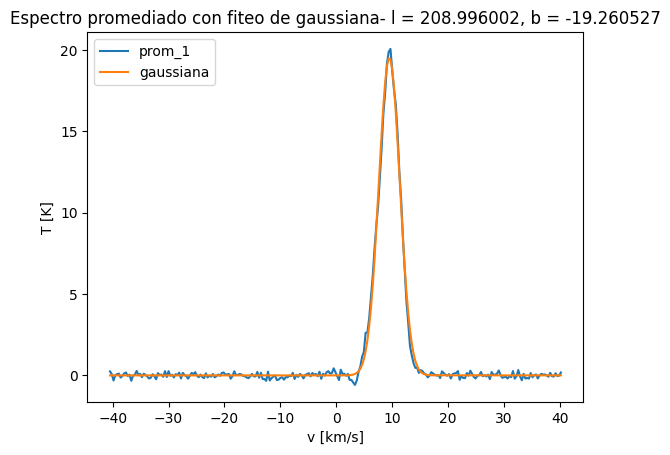

In [19]:
#gaussiana pero de otra forma
a=max(prom_1)
b=10
c=np.std(prom_1)
def gauss(x, a, b, c):
  output=a*np.exp(-0.5*((x-b)/c)**2)
  return output

par1, cov = curve_fit(f = gauss, xdata =  data_111.vel, ydata =  prom_1, p0 = [a, b, c])

plt.plot(data_111.vel, prom_1, label = 'prom_1')
plt.plot(data_111.vel, gauss(data_111.vel, par1[0], par1[1], par1[2]), label = 'gaussiana')
plt.legend(loc = 'upper left')
plt.title('Espectro promediado con fiteo de gaussiana- l = ' + str(lcoord_111) + ', b = ' + str(bcoord_111))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()


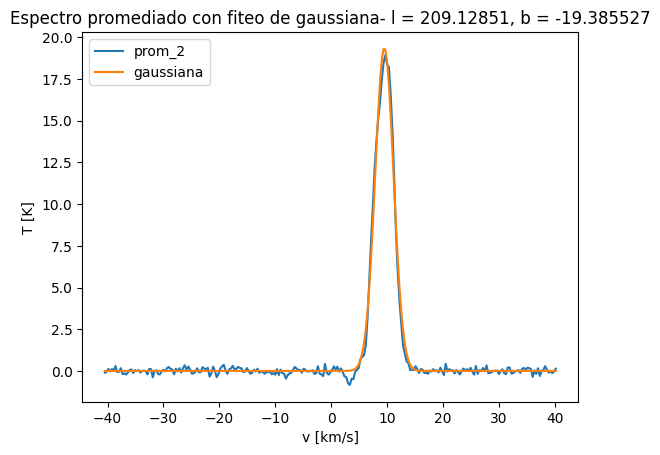

In [20]:

par2, cov = curve_fit(f = gauss, xdata =  data_111.vel, ydata =  prom_2, p0 = [a, b, c])

plt.plot(data_111.vel, prom_2, label = 'prom_2')
plt.plot(data_111.vel, gauss(data_111.vel, par2[0], par2[1], par2[2]), label = 'gaussiana')
plt.legend(loc = 'upper left')
plt.title('Espectro promediado con fiteo de gaussiana- l = ' + str(lcoord_114) + ', b = ' + str(bcoord_114))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()

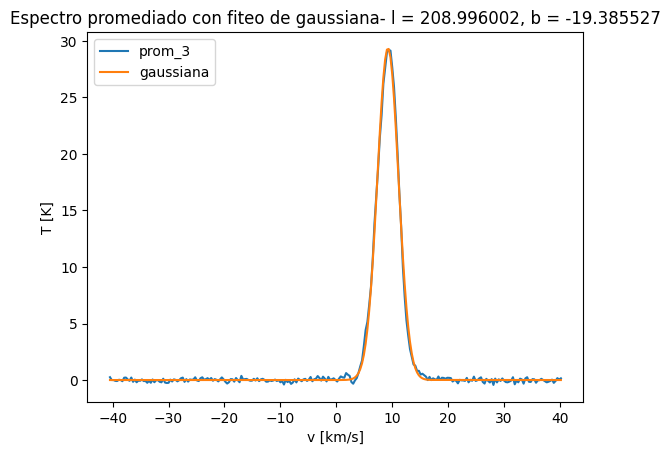

In [21]:
par3, cov = curve_fit(f = gauss, xdata =  data_111.vel, ydata =  prom_3, p0 = [a, b, c])

plt.plot(data_111.vel, prom_3, label = 'prom_3')
plt.plot(data_111.vel, gauss(data_111.vel, par3[0], par3[1], par3[2]), label = 'gaussiana')
plt.legend(loc = 'upper left')
plt.title('Espectro promediado con fiteo de gaussiana- l = ' + str(lcoord_118) + ', b = ' + str(bcoord_118))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()

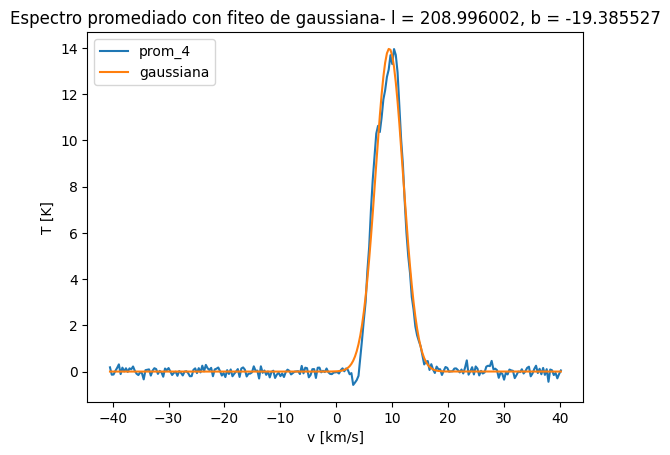

In [22]:
par4, cov = curve_fit(f = gauss, xdata =  data_111.vel, ydata =  prom_4, p0 = [a, b, c])

plt.plot(data_111.vel, prom_4, label = 'prom_4')
plt.plot(data_111.vel, gauss(data_111.vel, par4[0], par4[1], par4[2]), label = 'gaussiana')
plt.legend(loc = 'upper left')
plt.title('Espectro promediado con fiteo de gaussiana- l = ' + str(lcoord_118) + ', b = ' + str(bcoord_118))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()

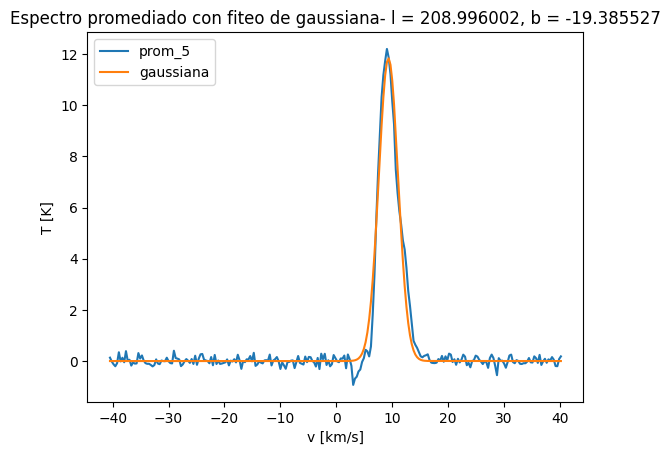

In [23]:
par5, cov = curve_fit(f = gauss, xdata =  data_111.vel, ydata =  prom_5, p0 = [a, b, c])

plt.plot(data_111.vel, prom_5, label = 'prom_5')
plt.plot(data_111.vel, gauss(data_111.vel, par5[0], par5[1], par5[2]), label = 'gaussiana')
plt.legend(loc = 'upper left')
plt.title('Espectro promediado con fiteo de gaussiana- l = ' + str(lcoord_118) + ', b = ' + str(bcoord_118))
plt.xlabel('v [km/s]')
plt.ylabel('T [K]')
plt.show()

In [24]:
#T_max= a por definicion
T_max1=par1[0]
T_max2=par2[0]
T_max3=par3[0]
T_max4=par4[0]
T_max5=par5[0]

T_max_l=np.array([T_max2, T_max3, T_max4])
T_max_b=np.array([T_max1, T_max3, T_max5])
lcord=np.array([lcoord_112, lcoord_113, lcoord_114])
bcord=np.array([bcoord_115, bcoord_113, bcoord_111])


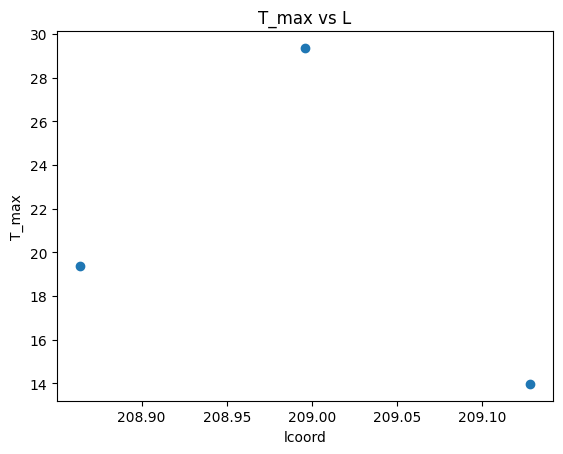

/tmp/ipython-input-2005634221.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  par6, cov = curve_fit(f = gauss, xdata =  lcord, ydata =  T_max_l, p0 = [a, mu, sgm])


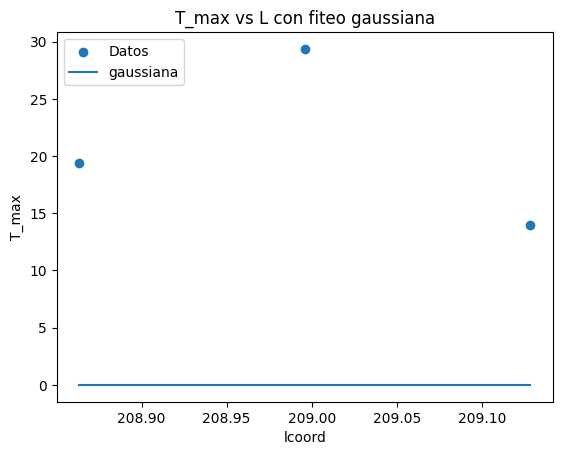

In [40]:
plt.scatter(lcord, T_max_l)
plt.title('T_max vs L')
plt.xlabel('lcoord')
plt.ylabel('T_max')
plt.show()

#fiteamos gaussiana
def gauss(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2)
mu = np.mean(T_max_l)
sgm = np.std(T_max_l)
a=max(T_max_l)

par6, cov = curve_fit(f = gauss, xdata =  lcord, ydata =  T_max_l, p0 = [a, mu, sgm])
sorted_indices = np.argsort(lcord)
plt.scatter(lcord, T_max_l, label="Datos")
plt.plot(lcord, gauss(lcord, par6[0], par6[1], par6[2]), label = 'gaussiana')
plt.legend(loc = 'upper left')
plt.title('T_max vs L con fiteo gaussiana')
plt.xlabel('lcoord')
plt.ylabel('T_max')
plt.show()

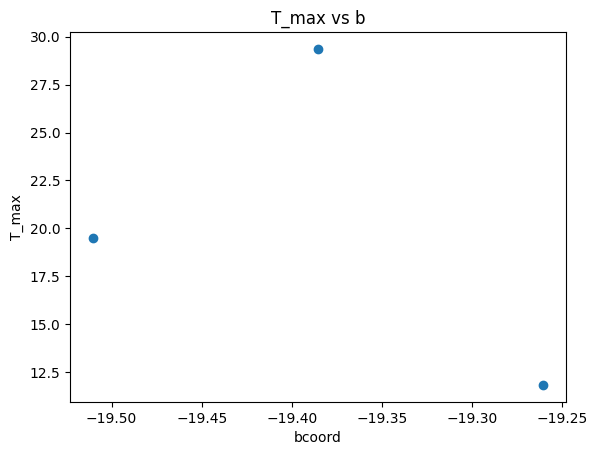

/tmp/ipython-input-3922797026.py:12: OptimizeWarning: Covariance of the parameters could not be estimated
  par6, cov = curve_fit(f = gauss, xdata =  bcord, ydata =  T_max_b, p0 = [a, b, c])


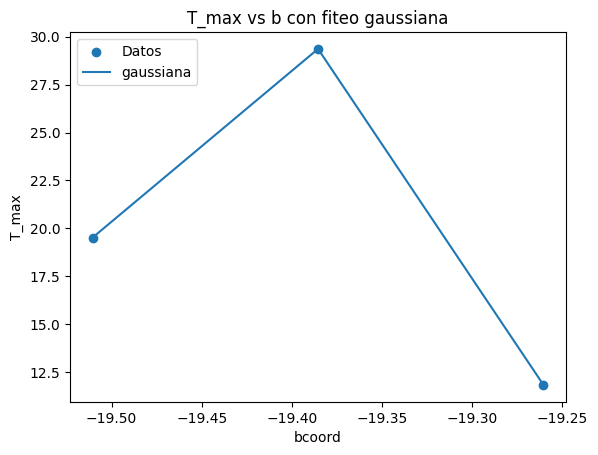

In [29]:
plt.scatter(bcord, T_max_b)
plt.title('T_max vs b')
plt.xlabel('bcoord')
plt.ylabel('T_max')
plt.show()

#fiteamos gaussiana
a=max(T_max_b)
b=bcord[np.argmax(T_max_b)]
c=np.std(T_max_b)

par6, cov = curve_fit(f = gauss, xdata =  bcord, ydata =  T_max_b, p0 = [a, b, c])
sorted_indices = np.argsort(bcord)
plt.scatter(bcord, T_max_b, label="Datos")
plt.plot(bcord[sorted_indices], gauss(bcord, par6[0], par6[1], par6[2])[sorted_indices], label = 'gaussiana')
plt.legend(loc = 'upper left')
plt.title('T_max vs b con fiteo gaussiana')
plt.xlabel('bcoord')
plt.ylabel('T_max')
plt.show()